### Mechanize 기본 사용법
아래에서 'data'에 해당 웹페이지의 소스 텍스트가 저장됨.

In [1]:
import mechanize
import http.cookiejar

cj = http.cookiejar.CookieJar()
br = mechanize.Browser()
br.set_cookiejar(cj)

br.open("https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do")

data = br.response().read().decode('utf-8')
data
# Do something here with `data`

'<!DOCTYPE html>\n<html lang="ko">\n\t<head>\n\t\t<title>과거관측 - 일별자료 - 기상청 날씨누리</title>\n\t\t<meta charset="utf-8" />\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes">\n\t\t<meta name="format-detection" content="telephone=no">\n\t\t<link rel="shortcut icon" href="/w/logo_mark.png" />\n    \t<link rel="apple-touch-icon-precomposed" href="/w/logo_mark.png" />\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=Edge">\n        <meta property="og:image" content="https://www.weather.go.kr/w/iphone-shortcut.png">\n\t\t<link href="/w/resources/css-2021/slick.css?ver=2024022701" rel="stylesheet" type="text/css">\n\t\t<link href="/w/resources/css-2021/basic.css?ver=2024022701" rel="stylesheet" type="text/css">\n\t\t<link href="/w/resources/css-2021/common-ui.css?ver=2024022701" rel="stylesheet" type="text/css">\n\t\t<link href="/w/resources/css-2021/common-ui-mobile.css?ver=2024022701" rel="stylesheet" type="text/css">\n\t\t<link h

## homework1 에서 크롤링해온 data

In [2]:
import re

final_data = [] ## 모은 데이터가 저장될 list ##
year = 2023 ## init year ##

while True:
    for month in range(1, 13):
        url = "https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy="+str(year)+"&mm="+str(month)+"&obs=1"
        print("waiting... ", url)
        br.open(url)
        data = br.response().read().decode("utf-8")

        ## 최고기온 추출 ##
        pattern_max = r'<span>최고기온:([-+]?\d*\.\d+|\d+)' ## 숫자 catch 
        d_max=re.findall(pattern_max, data)
        
        ## 최저기온 추출 ##
        pattern_min = r'<span>최저기온:([-+]?\d*\.\d+|\d+)' ## 숫자 catch 
        d_min=re.findall(pattern_min, data)
        
        ## 뽑아낸 최저기온과 최고기온을 튜플로 저장 ##
        data_list = list(zip(list(map(float, d_min)), list(map(float, d_max))))
        final_data = final_data + data_list
        print(final_data)

    if (len(final_data) >= 1000):
        break
    else:
        year = year - 1

print(len(final_data))


waiting...  https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2023&mm=1&obs=1
[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8)]
waiting...  https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2023&mm=2&obs=1
[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, 

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

[(-4.3, 3.8), (-7.4, -0.4), (-9.0, 0.6), (-5.7, 3.3), (-5.6, 3.6), (-4.7, 5.7), (-1.4, 3.8), (-3.7, 6.3), (-1.3, 7.0), (-3.9, 9.1), (-2.0, 9.2), (-0.6, 12.5), (5.1, 10.1), (3.8, 8.4), (-3.5, 3.8), (-6.8, -1.2), (-7.0, -0.4), (-4.6, 2.2), (-6.0, 4.3), (-7.7, 2.0), (-10.5, 1.5), (-2.8, 2.6), (-6.9, 4.6), (-17.0, -6.9), (-17.3, -5.4), (-9.0, -3.5), (-9.6, -3.8), (-11.2, -0.6), (-8.0, 4.9), (-4.4, 4.2), (-3.5, 7.8), (-3.0, 6.0), (-5.1, 1.4), (-3.9, 3.4), (-5.2, 6.0), (-3.3, 7.1), (-1.7, 8.8), (-0.6, 9.5), (-1.3, 7.8), (-2.8, 9.9), (1.1, 6.2), (-1.2, 8.5), (-0.9, 7.6), (2.7, 8.4), (-2.5, 6.6), (-1.2, 8.9), (-0.7, 4.5), (-1.5, 9.8), (3.0, 8.1), (0.2, 6.1), (-3.5, 2.4), (-5.3, 4.8), (-4.5, 8.4), (-1.8, 9.2), (-0.4, 8.5), (-2.9, 5.7), (-3.4, 9.4), (-1.8, 12.4), (-0.7, 8.7), (2.9, 9.0), (-1.8, 6.6), (-1.9, 10.4), (3.7, 14.1), (2.5, 15.4), (2.2, 16.5), (6.3, 19.4), (7.4, 17.7), (7.4, 13.1), (6.2, 22.2), (10.2, 22.8), (0.6, 12.6), (-1.9, 7.6), (3.3, 15.4), (3.5, 14.4), (0.4, 9.0), (0.7, 12.7), (2

In [3]:
## convert data list to dataframe ##
import pandas as pd

col_name = ['min_temp', 'max_temp']
temp_data = pd.DataFrame(final_data, columns=col_name)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## 문제 1 코드

In [4]:
## uniform distribution 으로 random sampling
import random
import matplotlib.pyplot as plt
import pandas as pd

new_data = random.sample(final_data, 100)
new_data

## convert data list to dataframe ##
col_name = ['sampling_min_temp', 'sampling_max_temp']
sampling_temp_data = pd.DataFrame(new_data, columns=col_name)

print(len(new_data))
for i in range(5):
    print(new_data[i])

100
(5.1, 16.8)
(24.0, 27.1)
(6.7, 15.5)
(-8.8, -3.9)
(14.1, 20.9)


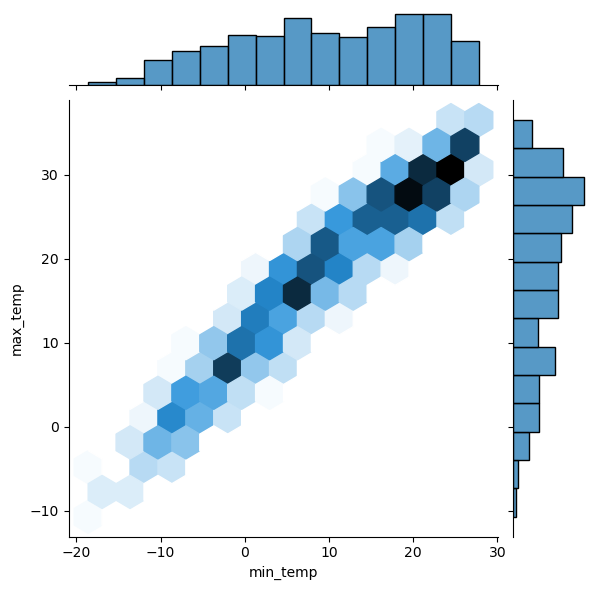

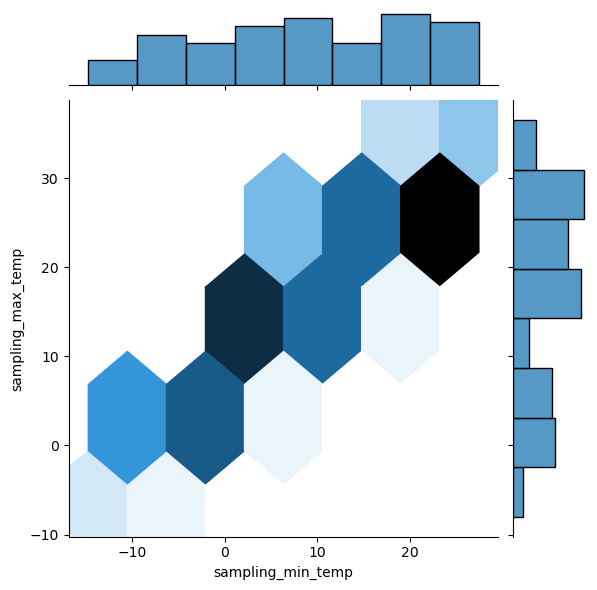

In [5]:
import seaborn as sns

## original data 로 contour plot 그리기
## draw contour plot ##
sns.jointplot(data=temp_data, x='min_temp', y='max_temp', kind='hex')
plt.show()

## sampling 한 100 개의 data 로 contour plot 그리기
## draw contour plot ##
sns.jointplot(data=sampling_temp_data, x='sampling_min_temp', y='sampling_max_temp', kind='hex')
plt.show()

## 문제 2 답변

In [6]:
import re

final_data = [] ## 모은 데이터가 저장될 list ##
year = 2023 ## init year ##

while True:
    for month in range(1, 13):
        url = "https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy="+str(year)+"&mm="+str(month)+"&obs=1"
        print("waiting... ", url)
        br.open(url)
        data = br.response().read().decode("utf-8")

        ## 최고기온 추출 ##
        pattern_max = r'<span>최고기온:([-+]?\d*\.\d+|\d+)' ## 숫자 catch 
        d_max=re.findall(pattern_max, data)
        
        ## 최저기온 추출 ##
        pattern_min = r'<span>최저기온:([-+]?\d*\.\d+|\d+)' ## 숫자 catch 
        d_min=re.findall(pattern_min, data)
        
        ## 월 정보가 담긴 list - 최고기온(또는 최저기온) 의 개수만큼 월을 반복해서 저장한 list ##
        month_list = (month for _ in range(len(d_max)))
        
        ## 뽑아낸 최저기온과 최고기온을 튜플로 저장 ##
        data_list = list(zip(list(map(float, d_min)), month_list, list(map(float, d_max))))
        final_data = final_data + data_list
        print(final_data)

    if (len(final_data) >= 1000):
        break
    else:
        year = year - 1

print(len(final_data))


waiting...  https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2023&mm=1&obs=1
[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8)]
waiting...  https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2023&mm=2&obs=1
[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

[(-4.3, 1, 3.8), (-7.4, 1, -0.4), (-9.0, 1, 0.6), (-5.7, 1, 3.3), (-5.6, 1, 3.6), (-4.7, 1, 5.7), (-1.4, 1, 3.8), (-3.7, 1, 6.3), (-1.3, 1, 7.0), (-3.9, 1, 9.1), (-2.0, 1, 9.2), (-0.6, 1, 12.5), (5.1, 1, 10.1), (3.8, 1, 8.4), (-3.5, 1, 3.8), (-6.8, 1, -1.2), (-7.0, 1, -0.4), (-4.6, 1, 2.2), (-6.0, 1, 4.3), (-7.7, 1, 2.0), (-10.5, 1, 1.5), (-2.8, 1, 2.6), (-6.9, 1, 4.6), (-17.0, 1, -6.9), (-17.3, 1, -5.4), (-9.0, 1, -3.5), (-9.6, 1, -3.8), (-11.2, 1, -0.6), (-8.0, 1, 4.9), (-4.4, 1, 4.2), (-3.5, 1, 7.8), (-3.0, 2, 6.0), (-5.1, 2, 1.4), (-3.9, 2, 3.4), (-5.2, 2, 6.0), (-3.3, 2, 7.1), (-1.7, 2, 8.8), (-0.6, 2, 9.5), (-1.3, 2, 7.8), (-2.8, 2, 9.9), (1.1, 2, 6.2), (-1.2, 2, 8.5), (-0.9, 2, 7.6), (2.7, 2, 8.4), (-2.5, 2, 6.6), (-1.2, 2, 8.9), (-0.7, 2, 4.5), (-1.5, 2, 9.8), (3.0, 2, 8.1), (0.2, 2, 6.1), (-3.5, 2, 2.4), (-5.3, 2, 4.8), (-4.5, 2, 8.4), (-1.8, 2, 9.2), (-0.4, 2, 8.5), (-2.9, 2, 5.7), (-3.4, 2, 9.4), (-1.8, 2, 12.4), (-0.7, 2, 8.7), (2.9, 3, 9.0), (-1.8, 3, 6.6), (-1.9, 3, 10.4)

KeyboardInterrupt: 

In [ ]:
## 총 수집된 data 개수 ##
print(len(final_data))

## display 5 sample datas ##
for i in range(0, 5):
    print(final_data[i])

In [ ]:
## convert data list to dataframe ##
import pandas as pd

col_name = ['min_temp', 'month', 'max_temp']
temp_data = pd.DataFrame(final_data, columns=col_name)

In [ ]:
## 문제 1-2 번 : 최저온도만 사용하여 y 를 regression 함. ##
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x_data = np.array(temp_data['min_temp'])
y_data = np.array(temp_data['max_temp'])

## x와 y를 2차원으로 만들어주기 ##
x1 = x_data.reshape(-1, 1)
y = y_data.reshape(-1, 1)

# print(X.shape)
# print(y.shape)

model = LinearRegression()
model.fit(x1, y)

y_pred = model.predict(x1)

mse = mean_squared_error(y, y_pred)
print(mse)

In [ ]:
## 문제 2-3 번 : 최저온도와 월 정보를 사용하여 y 를 regression 함. ##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x_data = np.array(temp_data['min_temp'])
m_data = np.array(temp_data['month'])
y_data = np.array(temp_data['max_temp'])

## x와 m, y를 2차원으로 만들어주기 ##
x1 = x_data.reshape(-1, 1)
x2 = m_data.reshape(-1, 1)
y = y_data.reshape(-1, 1)

## x1, x2 를 하나의 2차원 배열로 만들기 ##
X = np.column_stack((x1, x2))

# print(X.shape)
# print(y.shape)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
print(mse)

### MSE(x1) 과 MSE(x1, x2) 비교
x1 만을 사용해서 y를 regression 하는 model의 mse 가 x1, x2를 사용해서 y를 regression하는 model 보다 높다.
즉, MSE(x1) > MSE(x1, x2) 이므로 x1, x2를 사용해서 y를 regression 하는 모델이 성능이 더 좋다.

## 문제 3 코드

In [7]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

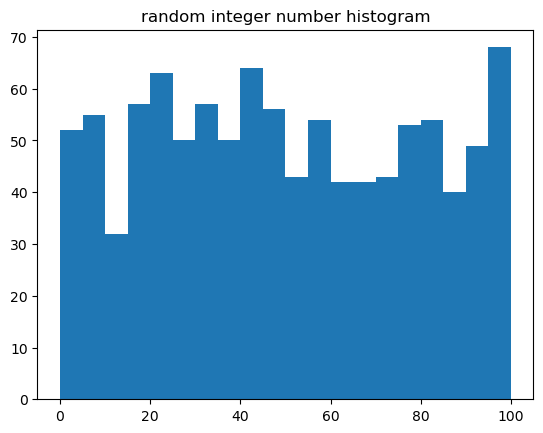

In [8]:
## 0-100 사이에 1,024개의 Random integer numbers 로 구성된 list 생성
num_list = [random.randint(0, 100) for _ in range(1024)]
# num_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

## 문제 3-1. num_list 를 사용해서 histogram draw
plt.hist(num_list, bins=20)

## labeling ##
plt.title('random integer number histogram')

plt.show()

In [9]:
## 문제 3-2. Haar wavelet transformation 을 적용하여 list 변환하기
coe = [] # store detail coefficients
ls = num_list # copy num_list data
mid_ls = [] # 중간단계에서 사용할 list (average 저장)
mid_coe = [] # 중간단계에서 생성될 detail coefficient list
ls_len = len(ls)

while True:
    print("ls_len : ", ls_len)
    # break condition : ls_len == 1 즉, average 만 남은 경우
    if ls_len == 1:
        break
        
    idx = 0
    # 1 step에 대해 수행 (1024개 data였다면 512로 변환하는 과정 수행)
    for i in range(0, ls_len, 2):
        mid_ls.append((ls[i] + ls[i+1]) / 2)
        mid_coe.append(ls[i] - mid_ls[idx])
        idx += 1
    
    # ls를 앞단계에서 구한 min_ls 로 update & ls_len 값도 변경된 list에 대한 값으로 update
    ls = mid_ls
    ls_len = len(ls)
    
    # 1 step 에서 구한 detail coefficients 를 coe list 에 저장
    coe.append(mid_coe)
    
    # mid_coe, mid_ls 초기화
    mid_coe = []
    mid_ls = []
    
# 변환된 최종 list 구하기 (average 뒤에 coefficients 붙이기)
# 현재 coefficient list 는 가장 먼저 구해진 list 가 가장 앞에 있으므로 reverse 해서 붙여주기
coe.reverse()
final_ls = [ls[0]]
for elem in coe:
    final_ls = final_ls + elem
        
# check result
print(len(final_ls))
for i in final_ls:
    print(i)

ls_len :  1024
ls_len :  512
ls_len :  256
ls_len :  128
ls_len :  64
ls_len :  32
ls_len :  16
ls_len :  8
ls_len :  4
ls_len :  2
ls_len :  1
1024
49.3466796875
-0.2451171875
-0.32421875
0.376953125
-0.73046875
-2.80078125
-1.171875
-1.31640625
-0.34375
3.7265625
4.28125
1.1953125
1.140625
-1.078125
-1.4921875
-0.796875
2.515625
2.859375
1.390625
0.1875
-2.46875
-5.875
0.859375
5.40625
1.0
-2.4375
-1.96875
0.96875
-3.84375
-0.390625
-0.859375
-4.109375
-3.71875
6.5
-4.1875
6.90625
-3.5
5.78125
3.34375
10.09375
8.0
1.9375
3.53125
13.28125
2.34375
-0.125
11.3125
-7.5625
-8.25
0.0625
2.15625
-7.90625
2.46875
-7.40625
-6.3125
-5.5
-4.25
2.5625
1.875
-2.40625
-5.9375
-9.40625
-2.03125
-4.0
8.5
0.5625
-3.8125
2.0625
5.9375
6.5625
7.4375
0.375
-1.0
15.0
8.625
9.1875
0.3125
1.25
2.5625
-2.875
5.0625
-1.5625
6.4375
-4.9375
0.0
10.3125
4.625
4.3125
-6.125
5.4375
2.3125
-16.4375
-13.125
-0.875
1.0625
-1.3125
0.9375
8.0625
-4.125
-6.125
-0.5
-6.8125
11.1875
-1.25
-3.1875
1.25
-0.625
-6.9375
5.87

In [10]:
## 문제 3-3. 3-2에서 변환한 데이터 30프로 압축하기
target_idx = len(final_ls) - round(len(final_ls) * 0.3) # 30프로 개수 구하기 (뒤에서 30프로 시작 인덱스)

# 30프로 압축 수행 (list 후반 30프로 0으로 대체)
for idx in range(target_idx, len(final_ls)):
    final_ls[idx] = 0
    
# check list
for i in range(len(final_ls)):
    print(i, ": ",  final_ls[i])

0 :  49.3466796875
1 :  -0.2451171875
2 :  -0.32421875
3 :  0.376953125
4 :  -0.73046875
5 :  -2.80078125
6 :  -1.171875
7 :  -1.31640625
8 :  -0.34375
9 :  3.7265625
10 :  4.28125
11 :  1.1953125
12 :  1.140625
13 :  -1.078125
14 :  -1.4921875
15 :  -0.796875
16 :  2.515625
17 :  2.859375
18 :  1.390625
19 :  0.1875
20 :  -2.46875
21 :  -5.875
22 :  0.859375
23 :  5.40625
24 :  1.0
25 :  -2.4375
26 :  -1.96875
27 :  0.96875
28 :  -3.84375
29 :  -0.390625
30 :  -0.859375
31 :  -4.109375
32 :  -3.71875
33 :  6.5
34 :  -4.1875
35 :  6.90625
36 :  -3.5
37 :  5.78125
38 :  3.34375
39 :  10.09375
40 :  8.0
41 :  1.9375
42 :  3.53125
43 :  13.28125
44 :  2.34375
45 :  -0.125
46 :  11.3125
47 :  -7.5625
48 :  -8.25
49 :  0.0625
50 :  2.15625
51 :  -7.90625
52 :  2.46875
53 :  -7.40625
54 :  -6.3125
55 :  -5.5
56 :  -4.25
57 :  2.5625
58 :  1.875
59 :  -2.40625
60 :  -5.9375
61 :  -9.40625
62 :  -2.03125
63 :  -4.0
64 :  8.5
65 :  0.5625
66 :  -3.8125
67 :  2.0625
68 :  5.9375
69 :  6.5625
70 

1024
512
0 :  33.0
1 :  70.0
2 :  60.0
3 :  77.0
4 :  67.0
5 :  1.0
6 :  94.0
7 :  38.0
8 :  88.0
9 :  92.0
10 :  4.0
11 :  8.0
12 :  22.0
13 :  51.0
14 :  7.0
15 :  32.0
16 :  90.0
17 :  16.0
18 :  45.0
19 :  80.0
20 :  7.0
21 :  48.0
22 :  98.0
23 :  52.0
24 :  20.0
25 :  24.0
26 :  72.0
27 :  43.0
28 :  3.0
29 :  96.0
30 :  74.0
31 :  95.0
32 :  55.0
33 :  46.0
34 :  27.0
35 :  12.0
36 :  58.0
37 :  81.0
38 :  42.0
39 :  62.0
40 :  49.0
41 :  25.0
42 :  96.0
43 :  96.0
44 :  72.0
45 :  55.0
46 :  31.0
47 :  20.0
48 :  24.0
49 :  34.0
50 :  85.0
51 :  67.0
52 :  57.0
53 :  18.0
54 :  36.0
55 :  5.0
56 :  20.0
57 :  96.0
58 :  8.0
59 :  26.0
60 :  35.0
61 :  65.0
62 :  22.0
63 :  21.0
64 :  47.0
65 :  26.0
66 :  98.0
67 :  27.0
68 :  8.0
69 :  30.0
70 :  92.0
71 :  96.0
72 :  86.0
73 :  25.0
74 :  49.0
75 :  18.0
76 :  45.0
77 :  99.0
78 :  3.0
79 :  4.0
80 :  76.0
81 :  51.0
82 :  21.0
83 :  59.0
84 :  83.0
85 :  86.0
86 :  69.0
87 :  51.0
88 :  71.0
89 :  74.0
90 :  14.0
91 :  96.0


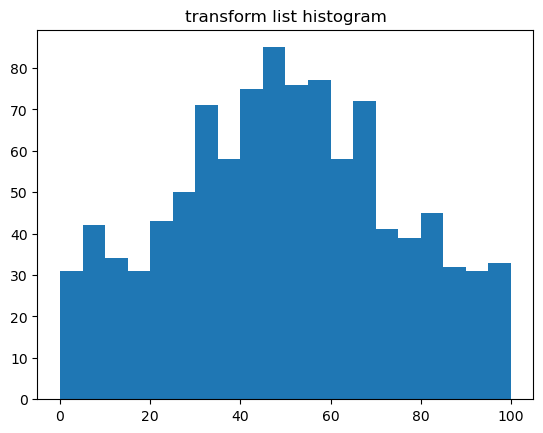

In [11]:
## 문제 3-4. 3-3 의 data 에 대해 Haar wavelet transformation 을 역으로 계산한 후
step=2
result = [(final_ls[0] + final_ls[1]), (final_ls[0] - final_ls[1])]
mid_res_ls = result
result = []

for idx in range(2, len(final_ls)):
    if (idx % (step*2) == 0):
        step *= 2
        mid_res_ls = result
        result = []
        
    res1 = mid_res_ls[idx%step] + final_ls[idx]
    res2 = mid_res_ls[idx%step] - final_ls[idx]
    result.append(res1)
    result.append(res2)
    
# check result
print(len(result))
print(step)
for i in range(len(result)):
    print(i, ": ",  result[i])

## 얻어진 list 에 대해 histogram 그리기
plt.hist(result, bins=20)

## labeling ##
plt.title('transform list histogram')

plt.show()

### 3-1에서 얻은 original data의 histogram과 비교
original data로 그린 histogram은 양 끝값(0, 100) 부근의 값도 많이 그려진다.

하지만 haar wavelet transformation을 적용한 list 를 다시 복원해서 histogram을 그리면 정규분포처럼 가운데 부분의 값은 비교적 제대로 복원되었지만, 양끝값으로 갈수록 빈도가 적어진다.

30프로 압축을 했기 때문에 가운데 값은 비교적 잘 복원되고, mean과 멀리 떨어져있는 값은 압축될 때 손실되었음을 알 수 있다.